# Red Wine Quality Prediction

Problem Statement:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):

1. - fixed acidity
2. - volatile acidity
3. - citric acid
4. - residual sugar
5. - chlorides
6. - free sulfur dioxide
7. - total sulfur dioxide
8. - density
9. - pH
10. - sulphates
11. - alcohol

Output variable (based on sensory data):

12. - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!


# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [3]:
pd.set_option('display.max_rows',None)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097   
11              7.5             0.500         0.36            6.10      0.071   
12              5.6             0.615         0.00            1.60      0.089   
13              7.8             0.610         0.29            1.60      0.114   
14              8.9             0.620         0.18            3.80      0.176   
15              8.9             0.620         0.19            3.90      0.170   
16              8.5             0.280         0.56            1.80      0.092   
17              8.1             0.560         0.28            1.70      0.368   
18              7.4             0.590         0.08            4.40      0.086   
19              7.9             0.320         0.51            1.80      0.341   
20              8.9             0.220         0.48            1.80      0.077   
21              7.6             0.390         0.31            2.30      0.082   
22              7.9             0.430         0.21            1.60      0.106   
23              8.5             0.490         0.11            2.30      0.084   
24              6.9             0.400         0.14            2.40      0.085   
25              6.3             0.390         0.16            1.40      0.080   
26              7.6             0.410         0.24            1.80      0.080   
27              7.9             0.430         0.21            1.60      0.106   
28              7.1             0.710         0.00            1.90      0.080   
29              7.8             0.645         0.00            2.00      0.082   
30              6.7             0.675         0.07            2.40      0.089   
31              6.9             0.685         0.00            2.50      0.105   
32              8.3             0.655         0.12            2.30      0.083   
33              6.9             0.605         0.12           10.70      0.073   
34              5.2             0.320         0.25            1.80      0.103   
35              7.8             0.645         0.00            5.50      0.086   
36              7.8             0.600         0.14            2.40      0.086   
37              8.1             0.380         0.28            2.10      0.066   
38              5.7             1.130         0.09            1.50      0.172   
39              7.3             0.450         0.36            5.90      0.074   
40              7.3             0.450         0.36            5.90      0.074   
41              8.8             0.610         0.30            2.80      0.088   
42              7.5             0.490         0.20            2.60      0.332   
43              8.1             0.660         0.22            2.20      0.069   
44              6.8             0.670         0.02            1.80      0.050   
45              4.6             0.520         0.15            2.10      0.054   
46              7.7             0.935         0.43            2.20      0.114   
47              8.7             0.290         0.52            1.60      0.113   
48              6.4             0.400

So by taking a look at the above data frame I can see that the column quality is the target label making the remaining columns as the features that we can customize and use to predict our label. This classifies to be a Classification problem!

In [4]:
df.shape

(1599, 12)

I see that there are total 1599 rows and 12 columns present in our dataset.

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We do not see any missing values in any of the columns of our dataset so we don't have to worry about handling missing data.

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None of the columns have any object data type values and our label is the only integer value making all the feature columns as float datatype i.e. similar datatype.

### Statistic Summary

In [9]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

Using the describe method I can see the count, mean, standard deviation, minimum, maximum and inter quantile values of our dataset.

Key observations:

    1. The mean is more than median (50th percentile) in all columns.
    
    2. There is a large defference in 75% percentile and max in residual sugar, free sulfur dioxide, total sulfur dioxide.
    
    3. The 1 and 2 observations suggest that there are extreme outliers present in these three columns.
    
    
All these gaps indicate that there are outliers present in our dataset which might need to be treated so as to get a better model accuracy later.

### Exploring data variable

In [10]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Target/dependent variable is discrete and categorical in nature

Quality score scale ranges from 3 to 8 ;
where 3 is low quality and 8 is best

Only scores obtained are between 3 to 8.

In [11]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Observations

Quality has most values concentrated in the categories of 5,6,7

Few observations are present in the categories in 3 and 8.

## Data Visualazations

In [12]:
To check missing values

SyntaxError: invalid syntax (<ipython-input-12-9d34011fc4b5>, line 1)

<AxesSubplot:>

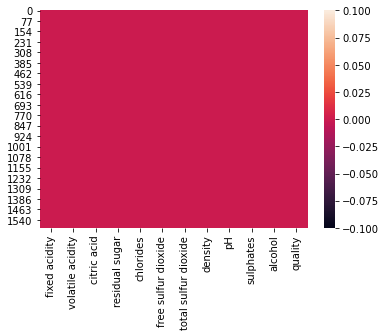

In [13]:
sns.heatmap(df.isnull())

## To check correlation

In [14]:
dfcor=df.corr()
dfcor

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

### Correlation using a Heatmap

1. Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

2. Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

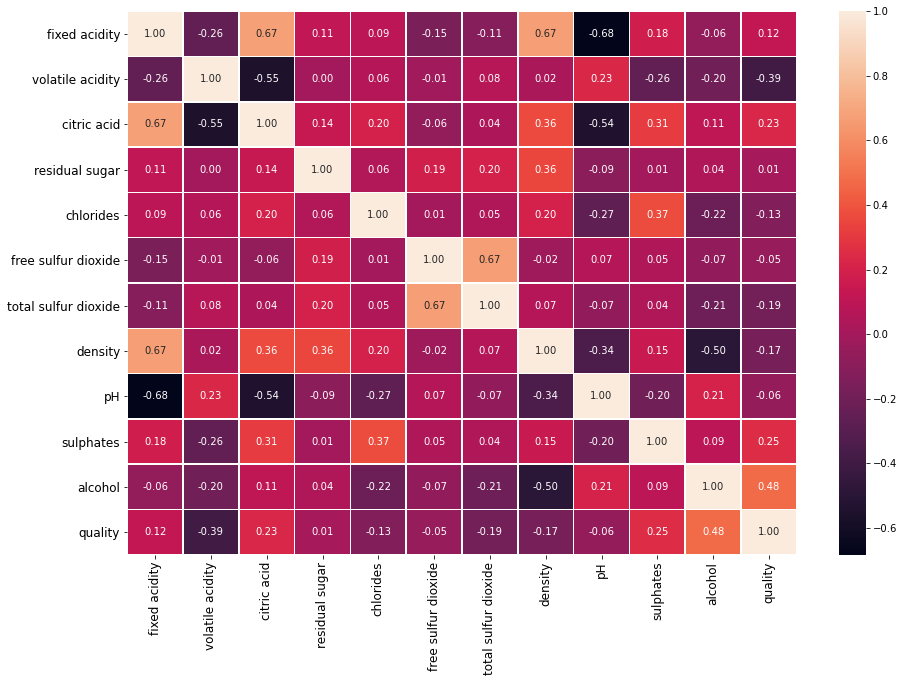

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="White", fmt='.2f')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

I see that the above heatmap shows the correlation matrix data wherein there are positive as well as negative correlations between the target label and other feture columns. A zero correlation indicates that there is no relationship between the variables. Looking at the above representation I see that quality column is positively correlated with alcohol and it is negatively correlated with the volatile acidity. The quality column is least correlated with residual sugar showing a coefficient value of 0.01 that close to 0. Similarly we can bifurcate all the other positively and negatively correlated feature columns with respect to the target label.

Also there are some highly positive and negative correlated feature columns that can pose the concern for multicollinearity. If the correlation coefficient, assuming it to be the variable 'r', is exactly +1 or -1, then it is called perfect multicollinearity. But even if this 'r' is close to -1 or +1 then one of the features should be removed from the model if at all possible.

Right now I see columns fixed acidity and citirc acid are positively correlated with a value of 0.67 which is close to 1. Similary, columns fixed acidity and density are positively correlated with a value of 0.668 again being close to 1. The other 2 column that's positively correlated are free sulfur dioxide and total sulfur dioxide with a value of 0.66 which is close to the value 1. The only negatively correlated columns that pop up are fixed acitidy and pH with a value -0.68 being close to the value -1.

We may need to deal with multicollinearity later if required to improve the accuracy of our machine learning models.

### Plotting outliers

In [16]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Univariate analysis

<AxesSubplot:>

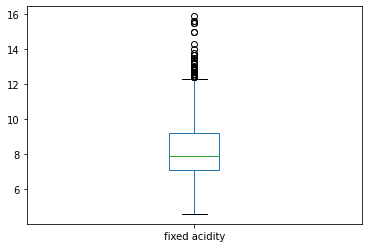

In [17]:
df['fixed acidity'].plot.box()

<AxesSubplot:>

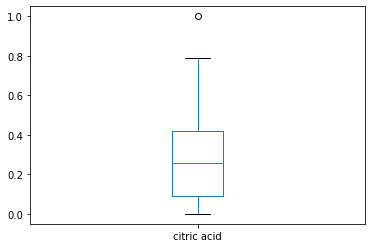

In [18]:
df['citric acid'].plot.box()

<AxesSubplot:>

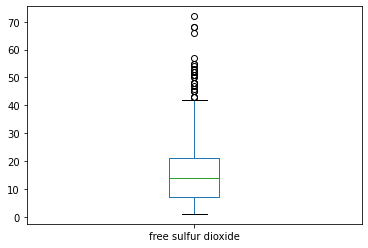

In [19]:
df['free sulfur dioxide'].plot.box()

<AxesSubplot:>

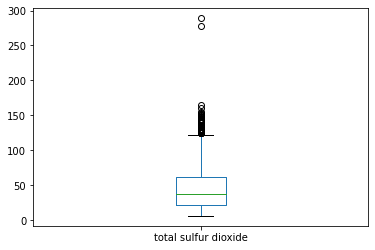

In [20]:
df['total sulfur dioxide'].plot.box()

In [21]:
df.shape

(1599, 12)

fixed acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
residual sugar          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
free sulfur dioxide     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
total sulfur dioxide          AxesSubplot(0.125,0.125;0.110714x0.343182)
density                    AxesSubplot(0.257857,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.390714,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
quality                    AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

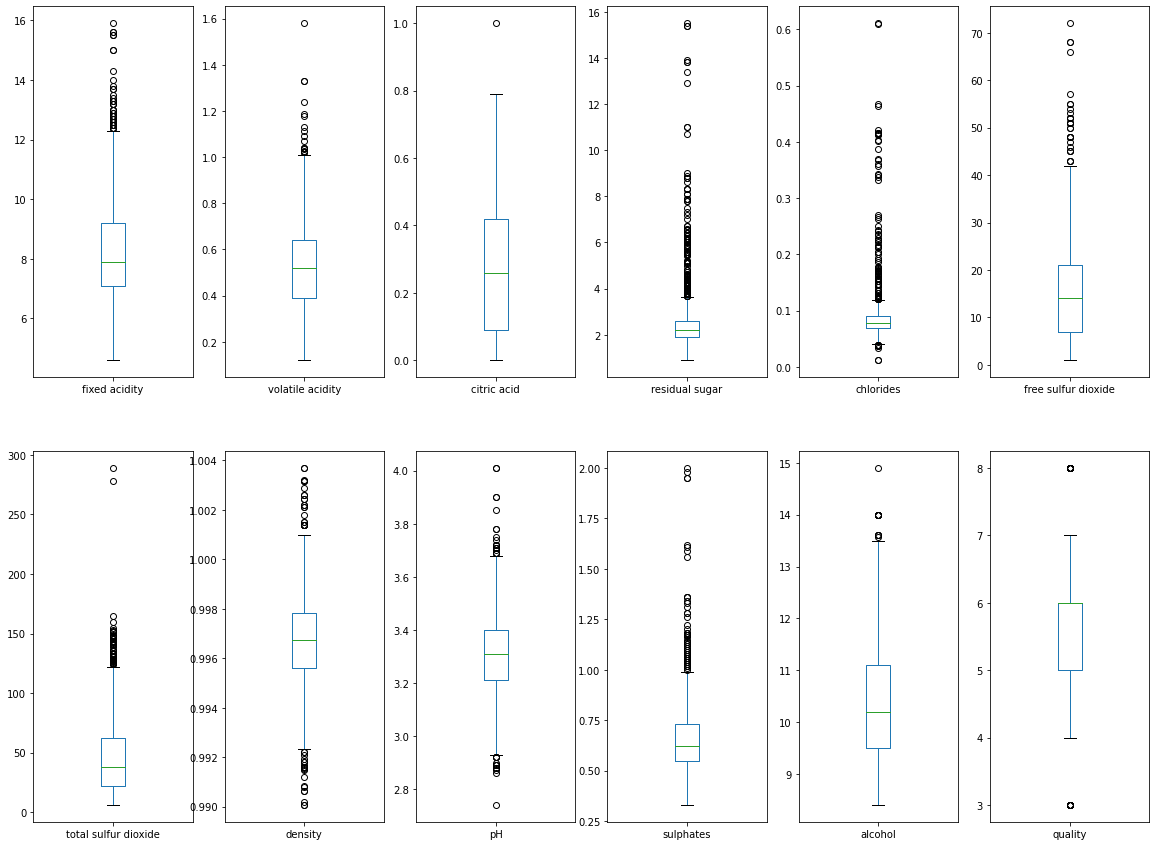

In [22]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(20,15))

With the help of the above boxplot we are able to see the whisker details and outliers clearly. I am ignoring the continous outlier sections but the outliers that are single values and far away from the whiskers of the boxplot may need to be treated depending upon further analysis. Right now I am just trying to retain as much of data which is possible in the given dataset.

## To check distribution of skewness

<AxesSubplot:xlabel='density', ylabel='Density'>

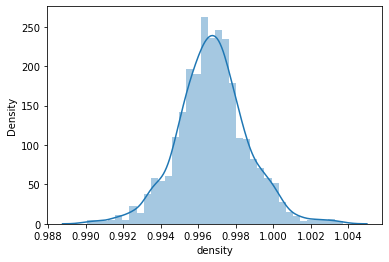

In [23]:
sns.distplot(df['density'])

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

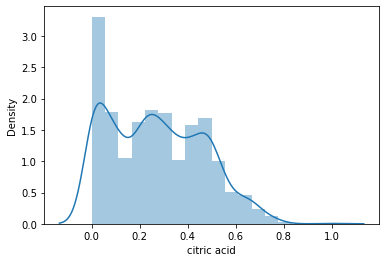

In [24]:
sns.distplot(df['citric acid'])

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

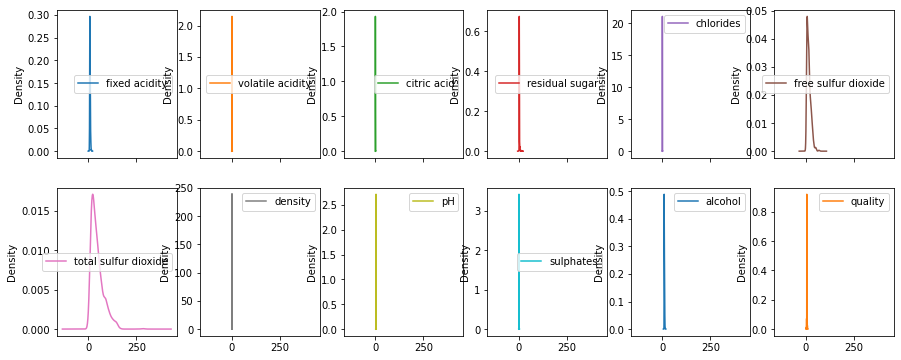

In [25]:
df.plot(kind='kde',subplots=True,layout=(2,6),figsize=(15,6))

### Bivariate analysis

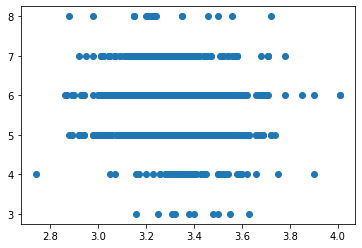

In [26]:
plt.scatter(df['pH'],df['quality'])

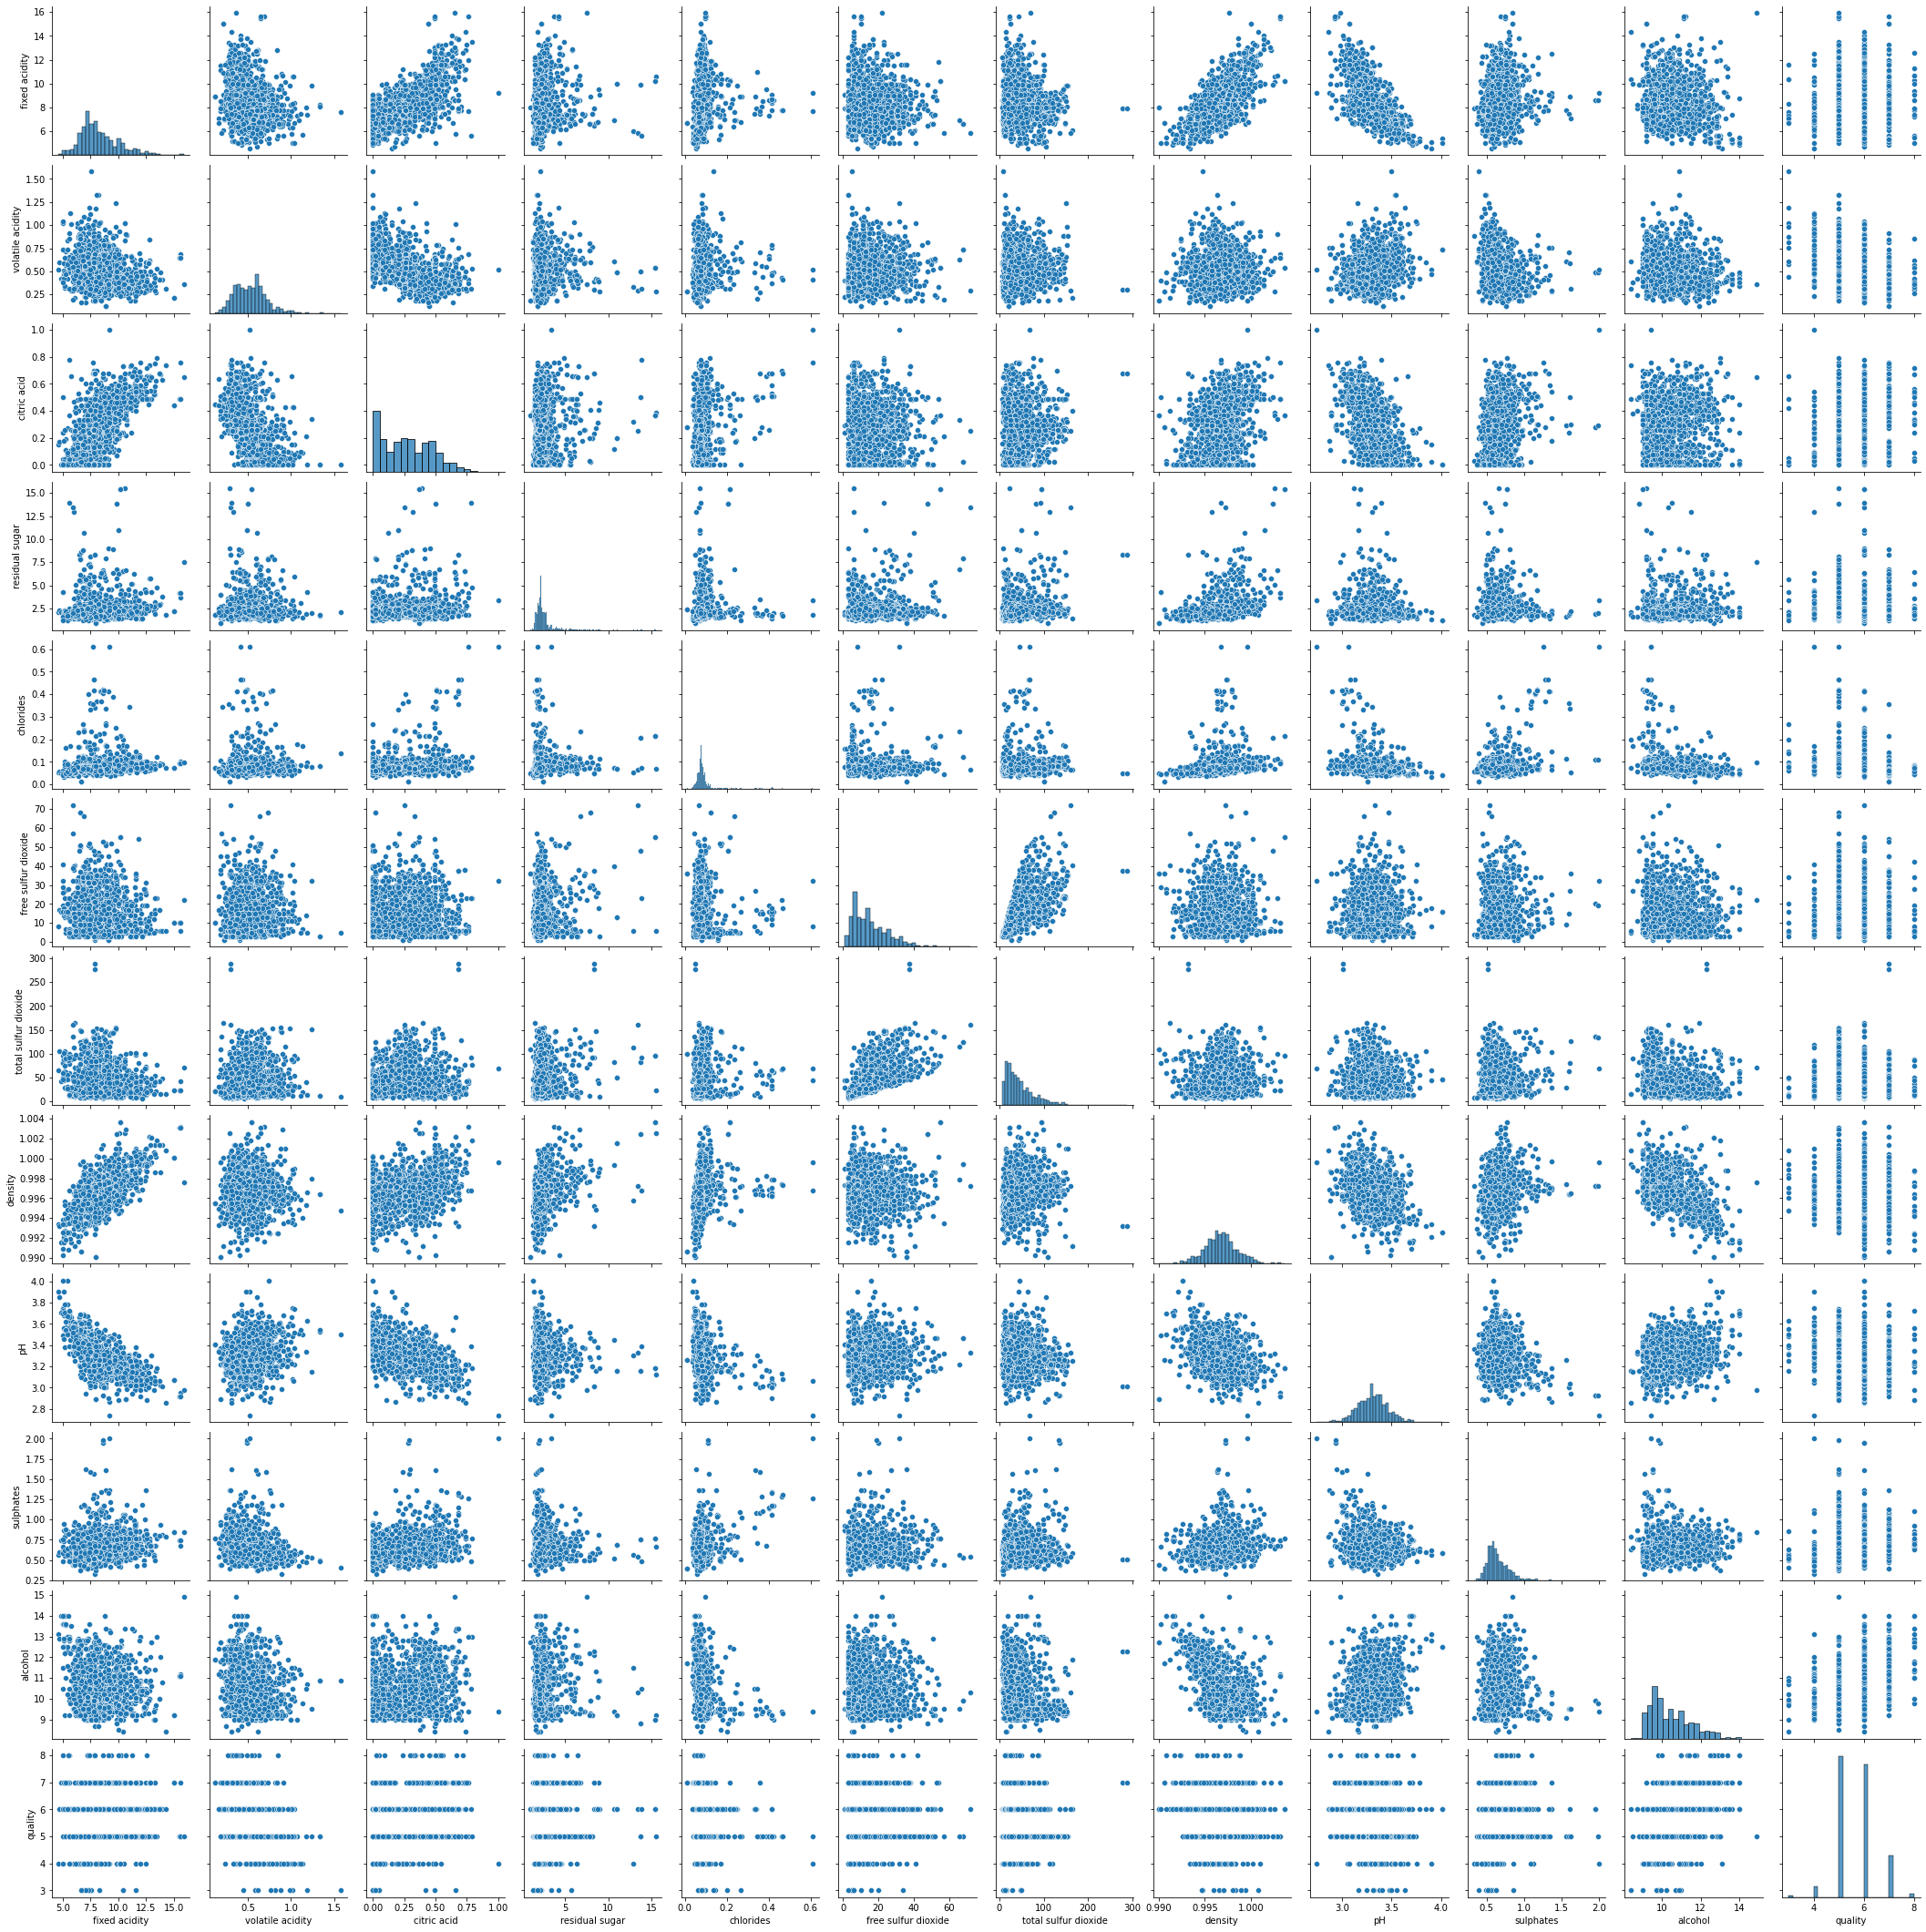

In [40]:
sns.pairplot(df)

### Dropping a column

In [27]:
df = df.drop('free sulfur dioxide', axis=1)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097   
11              7.5             0.500         0.36            6.10      0.071   
12              5.6             0.615         0.00            1.60      0.089   
13              7.8             0.610         0.29            1.60      0.114   
14              8.9             0.620         0.18            3.80      0.176   
15              8.9             0.620         0.19            3.90      0.170   
16              8.5             0.280         0.56            1.80      0.092   
17              8.1             0.560         0.28            1.70      0.368   
18              7.4             0.590         0.08            4.40      0.086   
19              7.9             0.320         0.51            1.80      0.341   
20              8.9             0.220         0.48            1.80      0.077   
21              7.6             0.390         0.31            2.30      0.082   
22              7.9             0.430         0.21            1.60      0.106   
23              8.5             0.490         0.11            2.30      0.084   
24              6.9             0.400         0.14            2.40      0.085   
25              6.3             0.390         0.16            1.40      0.080   
26              7.6             0.410         0.24            1.80      0.080   
27              7.9             0.430         0.21            1.60      0.106   
28              7.1             0.710         0.00            1.90      0.080   
29              7.8             0.645         0.00            2.00      0.082   
30              6.7             0.675         0.07            2.40      0.089   
31              6.9             0.685         0.00            2.50      0.105   
32              8.3             0.655         0.12            2.30      0.083   
33              6.9             0.605         0.12           10.70      0.073   
34              5.2             0.320         0.25            1.80      0.103   
35              7.8             0.645         0.00            5.50      0.086   
36              7.8             0.600         0.14            2.40      0.086   
37              8.1             0.380         0.28            2.10      0.066   
38              5.7             1.130         0.09            1.50      0.172   
39              7.3             0.450         0.36            5.90      0.074   
40              7.3             0.450         0.36            5.90      0.074   
41              8.8             0.610         0.30            2.80      0.088   
42              7.5             0.490         0.20            2.60      0.332   
43              8.1             0.660         0.22            2.20      0.069   
44              6.8             0.670         0.02            1.80      0.050   
45              4.6             0.520         0.15            2.10      0.054   
46              7.7             0.935         0.43            2.20      0.114   
47              8.7             0.290         0.52            1.60      0.113   
48              6.4             0.400

Free sulfur dioxide and total sulfur dioxide are both indicating towards the same feature of sulfur dioxide therefore dropping the free option and keeping just the total option in dataset.

## Outlier removal

In [30]:
df.shape

(1599, 11)

Confirming the number of columns and rows before removing the outliers from the dataset.

#### Z score method

In [32]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097   
11              7.5             0.500         0.36            6.10      0.071   
12              5.6             0.615         0.00            1.60      0.089   
14              8.9             0.620         0.18            3.80      0.176   
16              8.5             0.280         0.56            1.80      0.092   
18              7.4             0.590         0.08            4.40      0.086   
20              8.9             0.220         0.48            1.80      0.077   
21              7.6             0.390         0.31            2.30      0.082   
22              7.9             0.430         0.21            1.60      0.106   
23              8.5             0.490         0.11            2.30      0.084   
24              6.9             0.400         0.14            2.40      0.085   
25              6.3             0.390         0.16            1.40      0.080   
26              7.6             0.410         0.24            1.80      0.080   
27              7.9             0.430         0.21            1.60      0.106   
28              7.1             0.710         0.00            1.90      0.080   
29              7.8             0.645         0.00            2.00      0.082   
30              6.7             0.675         0.07            2.40      0.089   
31              6.9             0.685         0.00            2.50      0.105   
32              8.3             0.655         0.12            2.30      0.083   
34              5.2             0.320         0.25            1.80      0.103   
35              7.8             0.645         0.00            5.50      0.086   
36              7.8             0.600         0.14            2.40      0.086   
37              8.1             0.380         0.28            2.10      0.066   
39              7.3             0.450         0.36            5.90      0.074   
40              7.3             0.450         0.36            5.90      0.074   
41              8.8             0.610         0.30            2.80      0.088   
44              6.8             0.670         0.02            1.80      0.050   
46              7.7             0.935         0.43            2.20      0.114   
47              8.7             0.290         0.52            1.60      0.113   
48              6.4             0.400         0.23            1.60      0.066   
49              5.6             0.310         0.37            1.40      0.074   
50              8.8             0.660         0.26            1.70      0.074   
51              6.6             0.520         0.04            2.20      0.069   
52              6.6             0.500         0.04            2.10      0.068   
53              8.6             0.380         0.36            3.00      0.081   
54              7.6             0.510         0.15            2.80      0.110   
55              7.7             0.620         0.04            3.80      0.084   
56             10.2             0.420         0.57            3.40      0.070   
57              7.5             0.630

Using Z score method to get rid of outliers present in our dataset that are not in the acceptable range of +/-0.5 value of skewness.

In [33]:
df.shape

(1464, 11)

Checking the number of rows present in the dataset after applying the outlier removal technique.

In [34]:
# Percentage of Data Loss

data_loss=(1599-1464)/1599*100 
data_loss

8.442776735459661

After removing the outliers we are checking the data loss percentage by comparing the rows in our original data set and the new data set post removal of the outliers.

### Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [35]:
X = df.drop('quality', axis=1)
Y = df['quality']

Bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

#### Taking care of class imbalance

In [36]:
Y.value_counts()

5    624
6    590
7    187
4     47
8     16
Name: quality, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [43]:
import joblib
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [45]:
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097   
11              7.5             0.500         0.36            6.10      0.071   
12              5.6             0.615         0.00            1.60      0.089   
14              8.9             0.620         0.18            3.80      0.176   
16              8.5             0.280         0.56            1.80      0.092   
18              7.4             0.590         0.08            4.40      0.086   
20              8.9             0.220         0.48            1.80      0.077   
21              7.6             0.390         0.31            2.30      0.082   
22              7.9             0.430         0.21            1.60      0.106   
23              8.5             0.490         0.11            2.30      0.084   
24              6.9             0.400         0.14            2.40      0.085   
25              6.3             0.390         0.16            1.40      0.080   
26              7.6             0.410         0.24            1.80      0.080   
27              7.9             0.430         0.21            1.60      0.106   
28              7.1             0.710         0.00            1.90      0.080   
29              7.8             0.645         0.00            2.00      0.082   
30              6.7             0.675         0.07            2.40      0.089   
31              6.9             0.685         0.00            2.50      0.105   
32              8.3             0.655         0.12            2.30      0.083   
34              5.2             0.320         0.25            1.80      0.103   
35              7.8             0.645         0.00            5.50      0.086   
36              7.8             0.600         0.14            2.40      0.086   
37              8.1             0.380         0.28            2.10      0.066   
39              7.3             0.450         0.36            5.90      0.074   
40              7.3             0.450         0.36            5.90      0.074   
41              8.8             0.610         0.30            2.80      0.088   
44              6.8             0.670         0.02            1.80      0.050   
46              7.7             0.935         0.43            2.20      0.114   
47              8.7             0.290         0.52            1.60      0.113   
48              6.4             0.400         0.23            1.60      0.066   
49              5.6             0.310         0.37            1.40      0.074   
50              8.8             0.660         0.26            1.70      0.074   
51              6.6             0.520         0.04            2.20      0.069   
52              6.6             0.500         0.04            2.10      0.068   
53              8.6             0.380         0.36            3.00      0.081   
54              7.6             0.510         0.15            2.80      0.110   
55              7.7             0.620         0.04            3.80      0.084   
56             10.2             0.420         0.57            3.40      0.070   
57              7.5             0.630

#### Feature Scaling

In [46]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X # Displaying all the features after applying scaling technique to avoid bias output

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.550028          1.050174    -1.386158       -0.568896  -0.261878   
1         -0.306973          2.117255    -1.386158        0.236748   0.775968   
2         -0.306973          1.405868    -1.176549       -0.108528   0.492919   
3          1.758994         -1.439680     1.548377       -0.568896  -0.309053   
4         -0.550028          1.050174    -1.386158       -0.568896  -0.261878   
5         -0.550028          0.813045    -1.386158       -0.683988  -0.309053   
6         -0.246209          0.457352    -1.071744       -0.914172  -0.592102   
7         -0.610792          0.753763    -1.386158       -1.374540  -0.780801   
8         -0.306973          0.338787    -1.281353       -0.453804  -0.403403   
9         -0.489264         -0.135470     0.500328        4.264969  -0.497752   
10        -0.975374          0.338787    -0.966939       -0.683988   0.728793   
11        -0.489264         -0.135470     0.500328        4.264969  -0.497752   
12        -1.643776          0.546275    -1.386158       -0.914172   0.351394   
13         0.361428          0.575916    -0.442915        1.617853   4.455605   
14         0.118373         -1.439680     1.548377       -0.683988   0.492919   
15        -0.550028          0.398070    -0.966939        2.308405   0.209870   
16         0.361428         -1.795373     1.129157       -0.683988  -0.214703   
17        -0.428501         -0.787575     0.238316       -0.108528   0.021171   
18        -0.246209         -0.550446    -0.285708       -0.914172   1.153367   
19         0.118373         -0.194753    -0.809732       -0.108528   0.115520   
20        -0.853847         -0.728293    -0.652525        0.006564   0.162695   
21        -1.218429         -0.787575    -0.547720       -1.144356  -0.073179   
22        -0.428501         -0.669011    -0.128500       -0.683988  -0.073179   
23        -0.246209         -0.550446    -0.285708       -0.914172   1.153367   
24        -0.732319          1.109457    -1.386158       -0.568896  -0.073179   
25        -0.306973          0.724122    -1.386158       -0.453804   0.021171   
26        -0.975374          0.901969    -1.019341        0.006564   0.351394   
27        -0.853847          0.961251    -1.386158        0.121656   1.106192   
28        -0.003154          0.783404    -0.757329       -0.108528   0.068346   
29        -1.886830         -1.202551    -0.076098       -0.683988   1.011842   
30        -0.306973          0.724122    -1.386158        3.574417   0.209870   
31        -0.306973          0.457352    -0.652525        0.006564   0.209870   
32        -0.124682         -0.846857     0.081109       -0.338712  -0.733627   
33        -0.610792         -0.431882     0.500328        4.034785  -0.356228   
34        -0.610792         -0.431882     0.500328        4.034785  -0.356228   
35         0.300664          0.516634     0.185914        0.466932   0.304220   
36        -0.914611          0.872328    -1.281353       -0.683988  -1.488424   
37        -0.367737          2.443307     0.867145       -0.223620   1.530765   
38         0.239901         -1.380398     1.338767       -0.914172   1.483590   
39        -1.157666         -0.728293    -0.180903       -0.914172  -0.733627   
40        -1.643776         -1.261833     0.552731       -1.144356  -0.356228   
41         0.300664          0.813045    -0.023696       -0.799080  -0.356228   
42        -1.036138         -0.016906    -1.176549       -0.223620  -0.592102   
43        -1.036138         -0.135470    -1.176549       -0.338712  -0.639277   
44         0.179137         -0.846857     0.500328        0.697116  -0.026004   
45        -0.428501         -0.076188    -0.600122        0.466932   1.342066   
46        -0.367737          0.575916    -1.176549        1.617853   0.115520   
47         1.151357         -0.609728     1.600779        1.157485  -0.544927   
48        -0.489264          0.635199

Even though all our feature columns were of float data type I was unhappy with the decimal place differences and was worried that it might make my model biased. Therefore I am using the Standard Scaler method to ensure all my feature columns have been standardized.

## Creating the training and testing data sets

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

Taking 20 percent of the complete dataset for training purpose and the remaing 80 percent with be used to train the machine learning models

### Machine Learning Model for Classification and Evaluation Metrics

In [48]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [49]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 59.72696245733788

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        10
           5       0.69      0.70      0.70       134
           6       0.52      0.63      0.57       107
           7       0.52      0.37      0.43        38
           8       0.00      0.00      0.00         4

    accuracy                           0.60       293
   macro avg       0.35      0.34      0.34       293
weighted avg       0.57      0.60      0.58       293

Cross Validation Score: 58.95016129786339

Accuracy Score - Cross Validation Score is 0.7768011594744948


Created the Logistic Regression Model and checked for it's evaluation metrics.

In [50]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 61.092150170648466

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        10
           5       0.69      0.71      0.70       134
           6       0.53      0.65      0.58       107
           7       0.61      0.37      0.46        38
           8       0.00      0.00      0.00         4

    accuracy                           0.61       293
   macro avg       0.37      0.35      0.35       293
weighted avg       0.59      0.61      0.59       293

Cross Validation Score: 60.042077703492446

Accuracy Score - Cross Validation Score is 1.0500724671560207


Created the Support Vector Classifier Model and checked for it's evaluation metrics.

In [51]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 57.33788395904437

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        10
           5       0.67      0.69      0.68       134
           6       0.51      0.52      0.52       107
           7       0.53      0.50      0.51        38
           8       0.00      0.00      0.00         4

    accuracy                           0.57       293
   macro avg       0.34      0.34      0.34       293
weighted avg       0.56      0.57      0.57       293

Cross Validation Score: 47.541025760905136

Accuracy Score - Cross Validation Score is 9.796858198139233


Created the Decision Tree Classifier Model and checked for it's evaluation metrics.

In [53]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 67.57679180887372

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        10
           5       0.74      0.79      0.77       134
           6       0.62      0.65      0.64       107
           7       0.59      0.58      0.59        38
           8       0.00      0.00      0.00         4

    accuracy                           0.68       293
   macro avg       0.39      0.40      0.40       293
weighted avg       0.64      0.68      0.66       293

Cross Validation Score: 57.99429613352658

Accuracy Score - Cross Validation Score is 9.58249567534714


Created the Random Forest Classifier Model and checked for it's evaluation metrics.

In [54]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 58.02047781569966

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        10
           5       0.70      0.66      0.68       134
           6       0.50      0.61      0.55       107
           7       0.45      0.45      0.45        38
           8       0.00      0.00      0.00         4

    accuracy                           0.58       293
   macro avg       0.33      0.34      0.34       293
weighted avg       0.56      0.58      0.57       293

Cross Validation Score: 56.48721305343868

Accuracy Score - Cross Validation Score is 1.533264762260977


Created the K Neighbors Classifier Model and checked for it's evaluation metrics.

In [55]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 68.25938566552901

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        10
           5       0.75      0.80      0.78       134
           6       0.62      0.70      0.66       107
           7       0.62      0.47      0.54        38
           8       0.00      0.00      0.00         4

    accuracy                           0.68       293
   macro avg       0.40      0.39      0.39       293
weighted avg       0.65      0.68      0.66       293

Cross Validation Score: 57.99312730842956

Accuracy Score - Cross Validation Score is 10.266258357099453


Created the Extra Trees Classifier Model and checked for it's evaluation metrics.

# Hyper parameter tuning on the best ML Model

In [56]:
# Choosing Support Vector Classifier

svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}

After comparing all the classification models I have selected Support Vector Classifier as my best model and have listed down it's parameters above referring the sklearn webpage.

In [57]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

Using the Grid Search CV method for hyper parameter tuning best model.

In [58]:
GSCV.fit(X_train,Y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [59]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [60]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 61.092150170648466


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it.

# AUC ROC Curve

In [75]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

ValueError: SVC should be a binary classifier

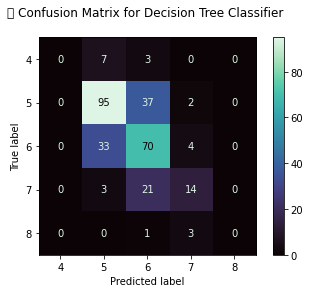

In [76]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

In [78]:
filename = "FinalModel_3.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_3.pkl']